In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as st

plt.style.use('fivethirtyeight')
font = {'family' : 'monospace',
        'size'   : 10}
matplotlib.rc('font', **font)
pd.set_option('display.max_colwidth', -1)

In [43]:
df = pd.read_csv('Apple-Twitter-Sentiment-DFE.csv',encoding='latin-1')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
_unit_id                3886 non-null int64
_golden                 3886 non-null bool
_unit_state             3886 non-null object
_trusted_judgments      3886 non-null int64
_last_judgment_at       3783 non-null object
sentiment               3886 non-null object
sentiment:confidence    3886 non-null float64
date                    3886 non-null object
id                      3886 non-null float64
query                   3886 non-null object
sentiment_gold          103 non-null object
text                    3886 non-null object
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [45]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


<h4>First, as you can see in the sentiment column, the values range between 0 and 5. So, it is imperitive to binarize it in the form of:<br>
- <font color=green>Positive Sentiment = 1</font> <br>
- <font color=red>Negative Sentiment = 0</font> <br>

Lets first remove the garbage values from the sentiment column which are either '3' or 'not_relevant' and also reset the index

</h4>

In [46]:
df = df[df['sentiment']!="3"]
df = df[df['sentiment']!='not_relevant']
df = df.reset_index()

In [47]:
df.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://...
1,7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected?...
2,10,623495523,True,golden,12,NaN,1,1.0000,Mon Dec 01 20:46:01 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
3,13,623495526,False,finalized,3,12/12/14 21:38,5,1.0000,Mon Dec 01 21:03:32 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,RT @peterpham: Bought my @AugustSmartLock at t...
4,14,623495527,True,golden,17,NaN,1,1.0000,Mon Dec 01 21:09:50 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,@apple Contact sync between Yosemite and iOS8 ...


As we are doing a simple sentiment analysis, we don't require many of the columns so lets drop them

In [48]:
df = df.drop(['index', '_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'date','id','query', 'sentiment_gold'], axis =1)

In [49]:
df.head()

,sentiment,sentiment:confidence,text
0,5,0.8468,Top 3 all @Apple #tablets. Damn right! http://...
1,5,0.6736,CNBCTV: #Apple's margins better than expected?...
2,1,1.0000,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
3,5,1.0000,RT @peterpham: Bought my @AugustSmartLock at t...
4,1,1.0000,@apple Contact sync between Yosemite and iOS8 ...


In [51]:
df['sentiment'] = df['sentiment'].astype(int)
df['sentiment'] = (df['sentiment']>3).astype(int)

In [52]:
df.head()

,sentiment,sentiment:confidence,text
0,1,0.8468,Top 3 all @Apple #tablets. Damn right! http://...
1,1,0.6736,CNBCTV: #Apple's margins better than expected?...
2,0,1.0000,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
3,1,1.0000,RT @peterpham: Bought my @AugustSmartLock at t...
4,0,1.0000,@apple Contact sync between Yosemite and iOS8 ...


<h5>As you can see, we binarized the sentiment column to 0 & 1. Lets count the number of instances of 0 and 1 as a sentiment:

In [53]:
print(df.sentiment.value_counts(),'\n')
print(round(423/1642 *100,2),'% +ve comments')
print(round(1219/1642 *100,2),'% -ve comments')

0    1219
1     423
Name: sentiment, dtype: int64 

25.76 % +ve comments
74.24 % -ve comments


This simply shows us that the number of comments with negative sentiment is approximately 3 times larger than the positive ones.

Lets clean the text column and remove all the extra jargon from it to process it further. We have to remove all url and Twitter symbols and convert all to lower case


In [54]:
from sklearn.model_selection import train_test_split
df['text'] = df['text'].str.replace(r"http\S+", "")
df['text'] = df['text'].str.replace(r"http", "")
df['text'] = df['text'].str.replace(r"@\S+", "")
df['text'] = df['text'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
df['text'] = df['text'].str.replace(r"@", "at")
df['text'] = df['text'].str.lower()

In [55]:
df.head()

,sentiment,sentiment:confidence,text
0,1,0.8468,top 3 all tablets damn right!
1,1,0.6736,cnbctv apple's margins better than expected?...
2,0,1.0000,wtf my battery was 31 one second ago and now ...
3,1,1.0000,rt bought my at the store pretty good logo...
4,0,1.0000,contact sync between yosemite and ios8 is ser...


As you can see, the data has been cleaned and the special symbols have been removed. You can save the data to a csv if you want

<h5>Now, we need to convert our text into a list of words to perform an analysis on the relation between the sentiment score and the text

In [59]:
from nltk import RegexpTokenizer
token_regex = RegexpTokenizer(r'\w+')
df['tokens'] = df['text'].apply(token_regex.tokenize)

In [64]:
df.head()

,sentiment,sentiment:confidence,text,tokens
0,1,0.8468,top 3 all tablets damn right!,"[top, 3, all, tablets, damn, right]"
1,1,0.6736,cnbctv apple's margins better than expected? aapl,"[cnbctv, apple, s, margins, better, than, expected, aapl]"
2,0,1.0000,wtf my battery was 31 one second ago and now is 29 wtf is this,"[wtf, my, battery, was, 31, one, second, ago, and, now, is, 29, wtf, is, this]"
3,1,1.0000,rt bought my at the store pretty good logo match can't wait to install it!,"[rt, bought, my, at, the, store, pretty, good, logo, match, can, t, wait, to, install, it]"
4,0,1.0000,contact sync between yosemite and ios8 is seriously screwed up it used to be much more stable in the past icloud isync,"[contact, sync, between, yosemite, and, ios8, is, seriously, screwed, up, it, used, to, be, much, more, stable, in, the, past, icloud, isync]"


Lets visualize the length of the sentences using modules

In [65]:
sentence_lengths = [len(tokens) for tokens in df['tokens']]

Text(0.5, 1.0, 'Sentence Word Count')

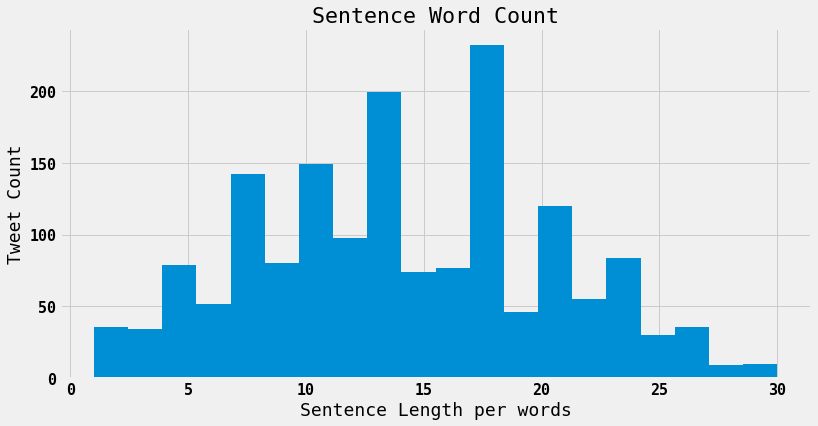

In [129]:
plt.figure(figsize=(12,6))
plt.hist(sentence_lengths, bins=20)
plt.ylabel('Tweet Count')
plt.xlabel('Sentence Length per words')
plt.title('Sentence Word Count')

In [111]:
#Set will remove all non-unique words and keep only one instance of it
vocabulary_used = sorted(list(set([word for tokens in df['tokens'] for word in tokens])))
all_words = [word for tokens in df['tokens'] for word in tokens]

In [94]:
print('The number of unique words in the tweets are: {}'.format(len(vocabulary_used)))

The number of unique words in the tweets are: 3701


In [112]:
from collections import Counter
wrd_count = [word.upper() for word in all_words]
counts = Counter()
for word in wrd_count:
    counts[word] +=1

In [119]:
cmmn=counts.most_common(20)

In [123]:
word_vs = []
word_count_vs = []

for j in range(20):
        word_vs.append(cmmn[j][0])
        word_count_vs.append(cmmn[j][1])

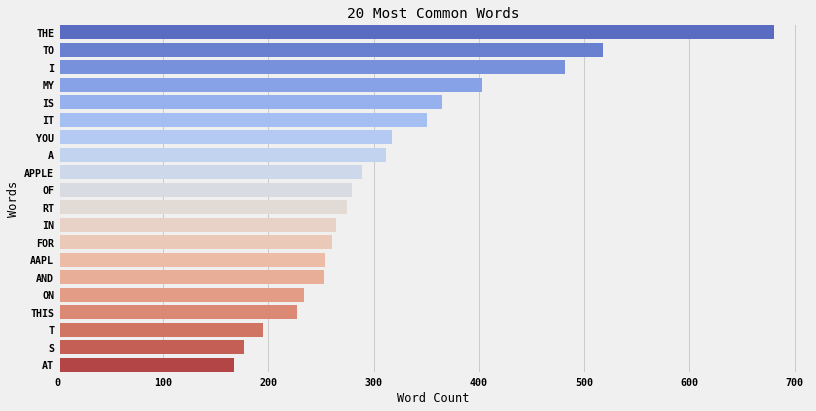

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(word_count_vs,word_vs,palette='coolwarm')
plt.title('20 Most Common Words')
plt.ylabel('Words')
plt.xlabel('Word Count')
plt.show()

As our main objective is to train a model to predict the sentiment, we need to divide our text into training and testing. Our dependent variables are 'text' and 'sentiment:confidence' and independant variable 'sentiment'.

In [148]:
from sklearn.model_selection import train_test_split
X = df[['text', 'sentiment:confidence']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=False)

In [149]:
X_train_conf, X_test_conf = X_train['sentiment:confidence'], X_test['sentiment:confidence']
X_train, X_test = X_train['text'], X_test['text']

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_mod = TfidfVectorizer()
X_train_tfidf = tfid_mod.fit_transform(X_train)
X_test_tfidf = tfid_mod.transform(X_test)

<h5>The above code turns the values in the dataframe into weighted arguements by calculating word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents

Now, lets visualize the processed data

In [166]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches

In [184]:
def plot_lsa(text, labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(text)
    lsa_scores = lsa.transform(text)
    color_dict = {label:idx for idx, label in enumerate(set(labels))}
    color_column = [color_dict[label] for label in labels]
    colors = ['orange', 'blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, c = labels, cmap = matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color='orange', label='Negative')
        green_patch = mpatches.Patch(color='blue', label='Positive')
        plt.legend(handles=[red_patch, green_patch], prop={'size': 20})

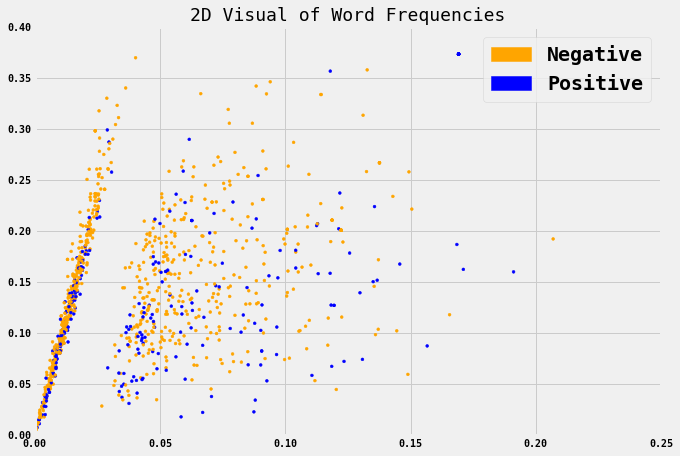

In [185]:
fig = plt.figure(figsize =(10,7))
plot_lsa(X_train_tfidf, y_train)
plt.xlim(0,0.25)
plt.ylim(0,0.4)
plt.title("2D Visual of Word Frequencies", size = 18)
plt.show()

Lets work on building our model

In [186]:
from sklearn.linear_model import LogisticRegressionCV
logr = LogisticRegressionCV()
logr.fit(X_train_tfidf, y_train)
y_pred_logr = logr.predict(X_test_tfidf)

In [187]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [189]:
clf = SVC(class_weight = 'balanced')
pipe = Pipeline([('classifier', clf)])
fit_params = {'classifier__kernel':['rbf', 'linear', 'poly'],
          'classifier__degree':[2, 3, 4],
          'classifier__C':[0.01, 0.1, 1, 10]}

In [190]:
gs = GridSearchCV(pipe, fit_params, cv = 10, return_train_score = True)
gs.fit(X_train_tfidf, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__degree': [2, 3, 4],
             

In [191]:
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_, gs.best_params_))

Best performing classifier parameters (score 0.8450953470633105):
{'classifier__C': 10, 'classifier__degree': 2, 'classifier__kernel': 'linear'}


In [192]:
pipe.set_params(classifier__degree = gs.best_params_['classifier__degree'],
                classifier__kernel = gs.best_params_['classifier__kernel'],
               classifier__C = gs.best_params_['classifier__C'])
pipe.fit(X_train_tfidf, y_train)
y_pred = pipe.predict(X_test_tfidf)

In [193]:
from sklearn.metrics import accuracy_score, classification_report

#Logistic Regression Eval
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred_logr))
print('\nLogistic Classification Report: \n' , classification_report(y_test,  y_pred_logr))

#SVM Eval
print('\n\n SVM Accuracy: ', accuracy_score(y_test, y_pred))
print('\nSVM Classification Report: \n' , classification_report(y_test,  y_pred))

Logistic Regression Accuracy:  0.7586206896551724

Logistic Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.85       350
           1       0.67      0.33      0.44       143

    accuracy                           0.76       493
   macro avg       0.72      0.63      0.64       493
weighted avg       0.74      0.76      0.73       493



 SVM Accuracy:  0.7525354969574036

SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       350
           1       0.62      0.38      0.47       143

    accuracy                           0.75       493
   macro avg       0.70      0.64      0.65       493
weighted avg       0.73      0.75      0.73       493



In [194]:
import itertools
from sklearn.metrics import confusion_matrix

In [195]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    return plt

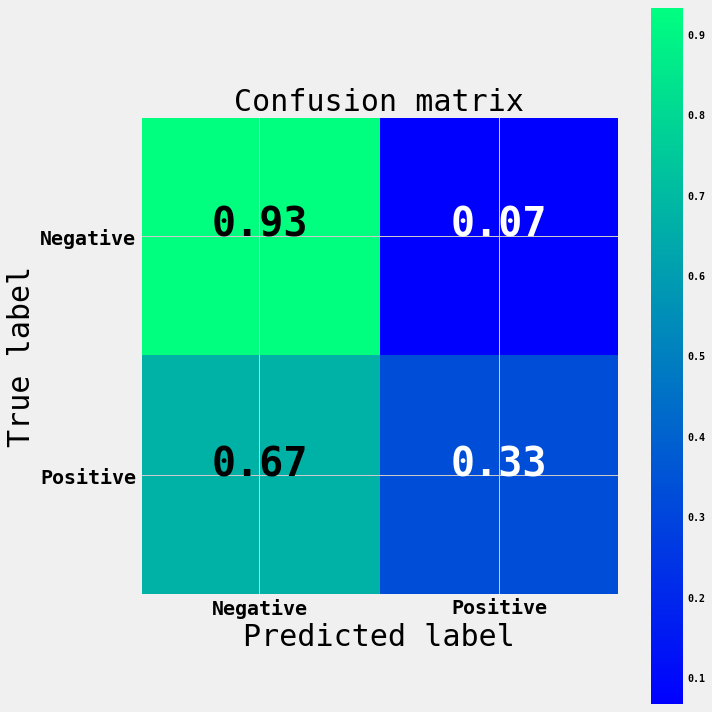

[[327  23]
 [ 96  47]]


In [196]:
cm = confusion_matrix(y_test, y_pred_logr)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=True, title='Confusion matrix')
plt.show()
print(cm)

In [197]:
def find_fn(ypred, ytrue):
    y_fn  = X_test[(ypred==0)&(ypred!=ytrue)]
    return y_fn

In [198]:
fn = find_fn(y_pred_logr, y_test)
print('Number of False Negatives: ', fn.shape, '\n')
print(fn[:1].values, '\n')
print(fn[1:2].values, '\n')
print(fn[2:3].values, '\n')
print(fn[3:4].values)

Number of False Negatives:  (96,) 

['fun  fun nights  post birthday celebration of rfrancoben and  '] 

['yeeaaayyy    awesome os x yosemite 10 10 1 roccckkkssss m    '] 

['apple   115 matches 8 4  increase in earnings  use 2014q3 eps  1 42 in   free ios app donkey stocks   aapl \n'] 

[' you guys should make pipes too!']


In [200]:
def find_fp(ypred, ytrue):
    y_fp  = X_test[(ypred==1)&(ypred!=ytrue)]
    return y_fp

In [201]:
fp = find_fp(y_pred_logr, y_test)
print('Number of False Positives: ', fp.shape, '\n')
print(fp[:1].values, '\n')
print(fp[1:2].values, '\n')
print(fp[2:3].values, '\n')
print(fp[3:4].values)

Number of False Positives:  (23,) 

["2)  i've got one question for yall  who is the genius who decided capitalizing random words was a good idea? bec it wasn't a good idea"] 

[" i know you have the most secure os but you've lost me as you don't have a  dualsim version for us travelling types"] 

['   best smartwatch is still the pebble '] 

["   you can already leave snap video messages in apple txts but they go away in 2 mins if you don't watch"]


In [205]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(tfid_mod, logr, 20)

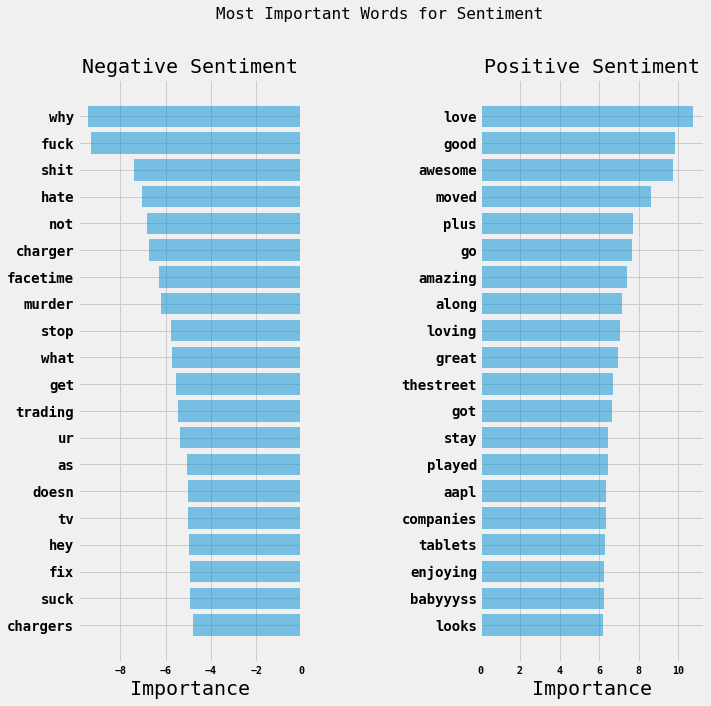

In [206]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative Sentiment', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive Sentiment', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most Important Words for Sentiment")

This project was for learning purposes only and is taken from:
https://harrisonjansma.com/apple

In [212]:
importance

{0: {'tops': [(6.185356690839333, 'looks'),
   (6.232881891755989, 'babyyyss'),
   (6.268651324131187, 'enjoying'),
   (6.302500655250562, 'tablets'),
   (6.3313522627704355, 'companies'),
   (6.335957854422052, 'aapl'),
   (6.442760537539119, 'played'),
   (6.464085109895349, 'stay'),
   (6.675141927654464, 'got'),
   (6.699972597361244, 'thestreet'),
   (6.959257543566796, 'great'),
   (7.051678475667488, 'loving'),
   (7.182229540068905, 'along'),
   (7.4280696110071, 'amazing'),
   (7.686567667880189, 'go'),
   (7.730378145596296, 'plus'),
   (8.613812051908594, 'moved'),
   (9.729446385472551, 'awesome'),
   (9.86215375793729, 'good'),
   (10.771843664801988, 'love')],
  'bottom': [(-4.788014949735879, 'chargers'),
   (-4.926486180268438, 'suck'),
   (-4.942634369218568, 'fix'),
   (-4.9483571454147555, 'hey'),
   (-4.998795264526465, 'tv'),
   (-5.029460913684107, 'doesn'),
   (-5.0623238890044995, 'as'),
   (-5.3577870433256205, 'ur'),
   (-5.465872129085266, 'trading'),
   (-5.